In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
from google.colab import drive #to import google drive data

In [3]:
drive.mount('/content/drive') #to mount the drive data into colab clound and enter the activation code

Mounted at /content/drive


In [4]:
cd /content/drive/"My Drive/Colab Notebooks/Workshop/KNN"

/content/drive/My Drive/Colab Notebooks/Workshop/KNN


In [6]:
#Import the dataset
df = pd.read_csv("People.csv")
df.head()

,Weight(x2),Height(y2),Class
0,51,167,Underweight
1,62,182,Normal
2,69,176,Normal
3,64,173,Normal
4,65,172,Normal


In [7]:
# For Visualization
# Split my dataframe into 2 sections: Normal and Underweight
u_df = df[df['Class']=='Underweight']
n_df = df[df['Class']=='Normal']

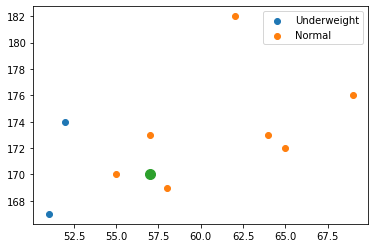

In [8]:
import matplotlib.pyplot as plt
plt.scatter(u_df['Weight(x2)'],u_df['Height(y2)'],label='Underweight')
plt.scatter(n_df['Weight(x2)'],n_df['Height(y2)'],label='Normal')
plt.scatter(57,170,s=100) # New Point to be classified
plt.legend()
plt.show()

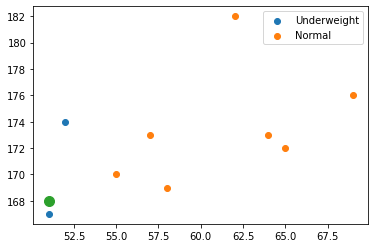

In [14]:
import matplotlib.pyplot as plt
plt.scatter(u_df['Weight(x2)'],u_df['Height(y2)'],label='Underweight')
plt.scatter(n_df['Weight(x2)'],n_df['Height(y2)'],label='Normal')
plt.scatter(51,168,s=100) # New Point to be classified
plt.legend()
plt.show()

In [9]:
x=df.iloc[:,[0,1]]
y=df.iloc[:,-1]

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
model=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
model.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [12]:
val=[[57,170]]
model.predict(val)

array(['Normal'], dtype=object)

In [13]:
model.kneighbors(val)

(array([[1.41421356, 2.        , 3.        ]]), array([[6, 8, 7]]))

In [15]:
val=[[51,168]]
model.predict(val)

array(['Underweight'], dtype=object)

In [16]:
model.kneighbors(val)

(array([[1.        , 4.47213595, 6.08276253]]), array([[0, 8, 5]]))

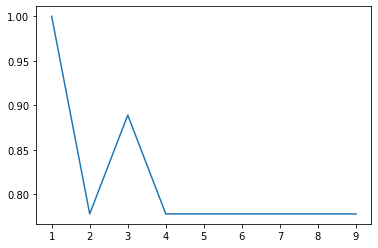

In [18]:
k=range(1,10)
total_acc=[]
for i in k:
  model_demo=KNeighborsClassifier(n_neighbors=i,metric='euclidean')
  model_demo.fit(x,y)
  acc=model_demo.score(x,y)
  total_acc.append(acc)
plt.plot(k,total_acc)
plt.show()